In [1]:
%load_ext tensorboard

In [37]:
%tensorboard --logdir './mylogs'

Reusing TensorBoard on port 6006 (pid 2024), started 1:37:48 ago. (Use '!kill 2024' to kill it.)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
v5 = pd.read_csv('./mylogs/v5/results.csv')
v8 = pd.read_csv('./mylogs/v8/results.csv')
v7 = pd.read_csv('./mylogs/v7/results.txt', sep='\s+', header=None)
v7.columns = ['Epoch','gpu_mem','train_box','obj',	'cls',	'total','labels','img_size','P','R','mAP@.5','mAP@.5:.95' ,'val_box','val_obj', 'val_cls']


Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 7/7 [00:16<00:00,  2.29s/it]
                   all        198       3126      0.561      0.481      0.474      0.276
                 basil        198        690      0.611      0.468      0.478      0.217
          black_olives        198        462      0.624      0.521       0.57      0.251
          green_olives        198        103      0.326      0.272      0.214     0.0823
             mushrooms        198        501       0.32      0.182      0.162     0.0731
             pepperoni        198        780      0.706      0.649      0.677      0.391
                 pizza        198        214      0.962      0.934      0.948       0.78
              tomatoes        198        376      0.376       0.34      0.273      0.139

In [4]:
def f1(P, R):
    return 2*P*R/(P+R)

In [8]:
def plot(lst, metric):
    plt.plot(lst[0], label="YOLOv5")
    plt.plot(lst[1], label="YOLOv7")
    plt.plot(lst[2], label="YOLOv8")
    plt.legend()
    plt.ylabel(metric)
    plt.xlabel("Epochs")
    plt.show()

In [5]:
precision = [v5['   metrics/precision'].values , v7['P'].values, v8['   metrics/precision(B)'].values]
recall = [v5['      metrics/recall'].values , v7['R'].values, v8['      metrics/recall(B)'].values]
mAP50 = [v5['     metrics/mAP_0.5'].values , v7['mAP@.5'].values, v8['       metrics/mAP50(B)'].values]
metric_95 = [v5['metrics/mAP_0.5:0.95'].values , v7['mAP@.5:.95'].values, v8['    metrics/mAP50-95(B)'].values]
f1_score = [f1(precision[0], recall[0]), f1(precision[1], recall[1]), f1(precision[2], recall[2])]

In [11]:
max_mAP = []
max_epoch = []
for x in mAP50_95:
    max_mAP.append(x.max())
    max_epoch.append(x.argmax())
    
print("Max mAP50-95")
print("YOLOv5:", max_mAP[0], "at epoch", max_epoch[0])
print("YOLOv7:", max_mAP[1], "at epoch", max_epoch[1])
print("YOLOv8:", max_mAP[2], "at epoch", max_epoch[2])

Max mAP50-95
YOLOv5: 0.27597 at epoch 92
YOLOv7: 0.3536 at epoch 40
YOLOv8: 0.32613 at epoch 11


In [26]:
print("Comparison")
print("YOLOv7 to v8:", max_mAP[1]/max_mAP[2])
print("YOLOv8 to v5:", max_mAP[2]/max_mAP[0])
print("YOLOv7 to v5:", max_mAP[1]/max_mAP[0])

Comparison
YOLOv7 to v8: 1.0842302149449607
YOLOv8 to v5: 1.1817588868355255
YOLOv7 to v5: 1.2812986918867995


In [12]:
print("At epoch 0 - mAP50-95")
print("YOLOv5:", mAP50_95[0][0])
print("YOLOv7:", mAP50_95[1][0])
print("YOLOv8:", mAP50_95[2][0])

At epoch 0 - mAP50-95
YOLOv5: 0.00031089
YOLOv7: 0.03863
YOLOv8: 0.19159


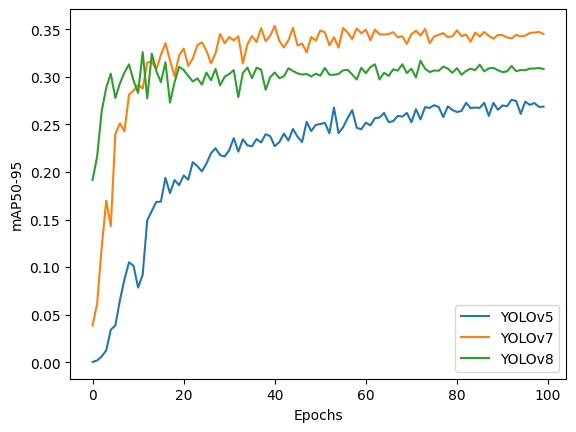

In [9]:
plot(mAP50_95, "mAP50-95")

In [28]:
print("At epoch 0 - mAP50")
print("YOLOv5:", mAP50[0][0])
print("YOLOv7:", mAP50[1][0])
print("YOLOv8:", mAP50[2][0])

At epoch 0 - mAP50
YOLOv5: 0.0016838
YOLOv7: 0.1055
YOLOv8: 0.32384


In [18]:
print("The model at optimal epoch - mAP50")
print("YOLOv5:", mAP50[0][max_epoch[0]])
print("YOLOv7:", mAP50[1][max_epoch[1]])
print("YOLOv8:", mAP50[2][max_epoch[2]])

The model at optimal epoch - mAP50
YOLOv5: 0.47466
YOLOv7: 0.5682
YOLOv8: 0.49671


In [27]:
print("Comparison")
print("YOLOv7 to v8:",  mAP50[1][max_epoch[1]]/ mAP50[2][max_epoch[2]])
print("YOLOv8 to v5:",  mAP50[2][max_epoch[2]]/ mAP50[0][max_epoch[0]])
print("YOLOv7 to v5:",  mAP50[1][max_epoch[1]]/ mAP50[0][max_epoch[0]])

Comparison
YOLOv7 to v8: 1.1439270399226915
YOLOv8 to v5: 1.0464543041334848
YOLOv7 to v5: 1.1970673745417773


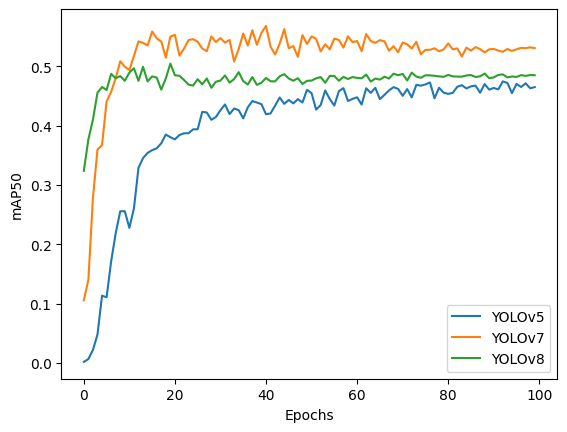

In [17]:
plot(mAP50, 'mAP50')

In [31]:
def get_details(metric, metric_name, max_epoch):
    print("At epoch 0 -", metric_name)
    print("YOLOv5:", metric[0][0])
    print("YOLOv7:", metric[1][0])
    print("YOLOv8:", metric[2][0])
    print("The model at optimal epoch -",metric_name)
    print("YOLOv5:", metric[0][max_epoch[0]])
    print("YOLOv7:", metric[1][max_epoch[1]])
    print("YOLOv8:", metric[2][max_epoch[2]])
    print("Comparison")
    print("YOLOv7 to v8:",  metric[1][max_epoch[1]]/ metric[2][max_epoch[2]])
    print("YOLOv8 to v5:",  metric[2][max_epoch[2]]/ metric[0][max_epoch[0]])
    print("YOLOv7 to v5:",  metric[1][max_epoch[1]]/ metric[0][max_epoch[0]])
    plot(metric, metric_name)

At epoch 0 - Precision
YOLOv5: 0.0028763
YOLOv7: 0.291
YOLOv8: 0.31933
The model at optimal epoch - Precision
YOLOv5: 0.56026
YOLOv7: 0.6008
YOLOv8: 0.57732
Comparison
YOLOv7 to v8: 1.0406706852352248
YOLOv8 to v5: 1.030450148145504
YOLOv7 to v5: 1.0723592617713205


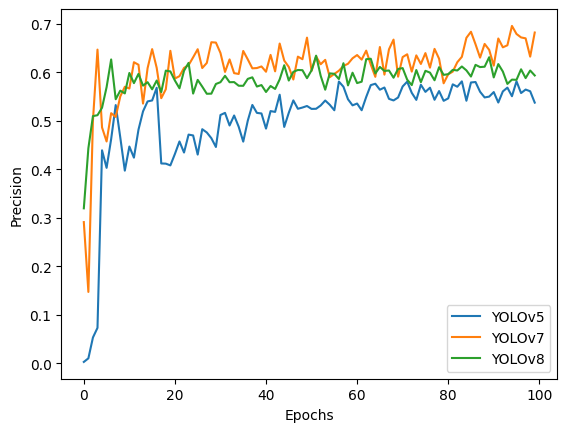

In [32]:
get_details(precision, "Precision", max_epoch)

At epoch 0 - Recall
YOLOv5: 0.055793
YOLOv7: 0.1339
YOLOv8: 0.40273
The model at optimal epoch - Recall
YOLOv5: 0.48272
YOLOv7: 0.5677
YOLOv8: 0.48955
Comparison
YOLOv7 to v8: 1.159636400776223
YOLOv8 to v5: 1.0141489890619821
YOLOv7 to v5: 1.176044083526682


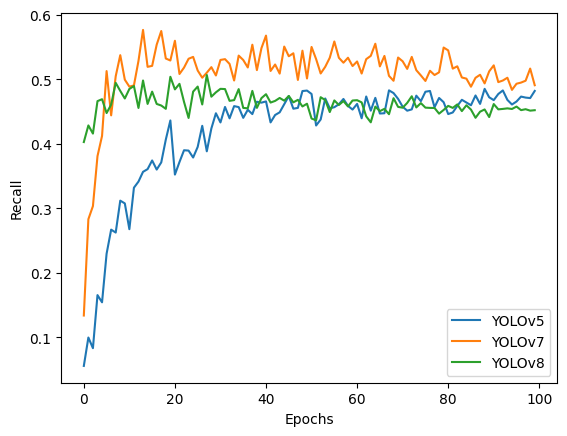

In [33]:
get_details(recall, "Recall", max_epoch)

At epoch 0 - F1 Score
YOLOv5: 0.005470575101458514
YOLOv7: 0.18340738997411157
YOLOv8: 0.3562135304545329
The model at optimal epoch - F1 Score
YOLOv5: 0.518607657289689
YOLOv7: 0.5837811895592641
YOLOv8: 0.5298246384282996
Comparison
YOLOv7 to v8: 1.1018385088527103
YOLOv8 to v5: 1.0216290310814768
YOLOv7 to v5: 1.1256702082074537


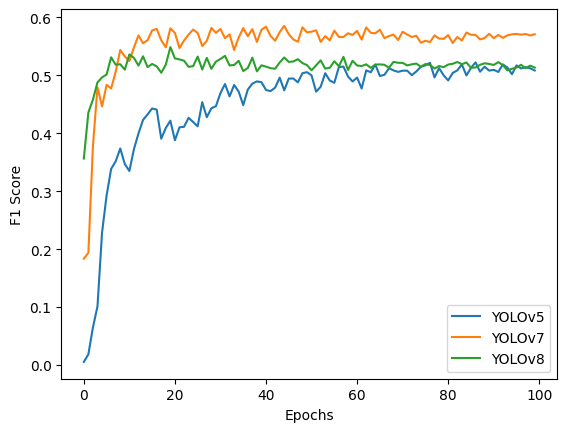

In [34]:
get_details(f1_score, "F1 Score", max_epoch)

### Per Class

In [54]:
v5 = pd.read_csv('./Per Class/v5.txt', sep='\s+')
v7 = pd.read_csv('./Per Class/v7.txt', sep='\s+')
v8 = pd.read_csv('./Per Class/v8.txt', sep='\s+')

In [69]:
v7

,Class,Images,Labels,P,R,mAP@.5,mAP@.5:.95:
0,all,196,3040,0.632,0.525,0.542,0.3490
1,basil,196,631,0.671,0.553,0.585,0.3200
2,black_olives,196,437,0.716,0.590,0.632,0.3620
3,green_olives,196,103,0.603,0.236,0.302,0.1250
4,mushrooms,196,501,0.363,0.239,0.206,0.0906
5,pepperoni,196,780,0.778,0.701,0.741,0.4630
6,pizza,196,212,0.888,0.970,0.971,0.8730
7,tomatoes,196,376,0.407,0.388,0.353,0.2070


In [77]:
res = pd.DataFrame([v5['Class'].values, v5['mAP50-95'].values, v7['mAP@.5:.95:'].values, v8['mAP50-95'].values]).transpose()
res.columns = ['Class', 'v5', 'v7', 'v8']

In [83]:
res.sort_values('v8', ascending=False)

,Class,v5,v7,v8
4,mushrooms,0.0731,0.0906,0.054
3,green_olives,0.0823,0.125,0.152
7,tomatoes,0.139,0.207,0.186
1,basil,0.217,0.32,0.26
2,black_olives,0.251,0.362,0.261
0,all,0.276,0.349,0.304
5,pepperoni,0.391,0.463,0.379
6,pizza,0.78,0.873,0.836


### Images

In [35]:
import os

In [43]:
v5images = sorted(os.listdir('./predict/v5/'))
v7images = sorted(os.listdir('./predict/v7/'))
v8images = sorted(os.listdir('./predict/v8/'))

In [ ]:
for x in range(30):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(plt.imread('./predict/v5/'+v5images[x]), cmap='gray')
    axs[0].set_title('YOLOv5')
    axs[0].axis('off')

    axs[1].imshow(plt.imread('./predict/v7/'+v7images[x]), cmap='gray')
    axs[1].set_title('YOLOv7')
    axs[1].axis('off')

    axs[2].imshow(plt.imread('./predict/v8/'+v8images[x]), cmap='gray')
    axs[2].set_title('YOLOv8')
    axs[2].axis('off')